# Importação bibliotecas

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf


# carregamento Base de dados

In [4]:
incaData = pd.read_csv(r'E:\IniciacaoCientifica\Dataset\inca15.csv',low_memory = False)
incaData = incaData.drop(incaData[incaData['estadofinal'] > 8].index)
incaData['idade1'][incaData['idade1'] > 0].mean()
incaData.loc[incaData['idade1'] < 0,'idade1'] = 58

# Vizualização dos dados

In [5]:
incaData.head()

,sexo,racacor,clitrat,histfamc,alcoolis,tabagism,loctudet,tnm,estadiam,pritrath,ocupacao,dias,idade1,tipohist1,tipohist2,estadofinal
3,2,2,31,1,1,1,50,220,3A,8,3106200,356,55,8500,3,4
8,2,4,15,1,1,1,53,100,1B,8,3106200,50,41,8070,3,4
10,2,4,31,1,1,1,34,999,4,8,3106200,55,72,8140,3,4
13,2,1,31,2,1,1,18,999,4B,8,3106200,203,74,8140,3,4
19,2,4,31,9,9,9,77,888,99,6,3106200,1001,77,9673,3,8


In [6]:
incaData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1304004 entries, 3 to 2973447
Data columns (total 16 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   sexo         1304004 non-null  int64 
 1   racacor      1304004 non-null  int64 
 2   clitrat      1304004 non-null  int64 
 3   histfamc     1304004 non-null  int64 
 4   alcoolis     1304004 non-null  int64 
 5   tabagism     1304004 non-null  int64 
 6   loctudet     1304004 non-null  object
 7   tnm          1304004 non-null  object
 8   estadiam     1304004 non-null  object
 9   pritrath     1304004 non-null  int64 
 10  ocupacao     1304004 non-null  int64 
 11  dias         1304004 non-null  int64 
 12  idade1       1304004 non-null  int64 
 13  tipohist1    1304004 non-null  object
 14  tipohist2    1304004 non-null  object
 15  estadofinal  1304004 non-null  int64 
dtypes: int64(11), object(5)
memory usage: 169.1+ MB


In [7]:
incaData.describe()

,sexo,racacor,clitrat,histfamc,alcoolis,tabagism,pritrath,ocupacao,dias,idade1,estadofinal
count,1.304004e+06,1.304004e+06,1.304004e+06,1.304004e+06,1.304004e+06,1.304004e+06,1.304004e+06,1.304004e+06,1.304004e+06,1.304004e+06,1.304004e+06
mean,1.563245e+00,2.901392e+00,2.368454e+01,4.707780e+00,4.173556e+00,3.923578e+00,7.839261e+00,3.272595e+06,1.137918e+02,5.745400e+01,2.637820e+00
std,4.959841e-01,2.334568e+00,1.089262e+01,3.735510e+00,3.574420e+00,3.408096e+00,9.047023e-01,8.907216e+05,1.986968e+02,1.678870e+01,1.747348e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.100049e+06,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.000000e+00,1.000000e+00,2.300000e+01,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00,2.704302e+06,1.900000e+01,4.700000e+01,1.000000e+00
50%,2.000000e+00,2.000000e+00,2.400000e+01,2.000000e+00,3.000000e+00,3.000000e+00,8.000000e+00,3.162500e+06,5.900000e+01,5.900000e+01,3.000000e+00
75%,2.000000e+00,4.000000e+00,3.100000e+01,9.000000e+00,9.000000e+00,9.000000e+00,8.000000e+00,4.106902e+06,1.250000e+02,6.900000e+01,3.000000e+00
max,2.000000e+00,9.000000e+00,9.900000e+01,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,5.300108e+06,2.000000e+03,9.900000e+01,8.000000e+00


# Atributos não categoricos

In [8]:
def Sel_int64(data):
    lista = []
    for column in data.columns:
        if (data[column].dtype == np.int64):
            lista.append(column)
    return lista

In [9]:
colunas = Sel_int64(incaData)
print(colunas)

['sexo', 'racacor', 'clitrat', 'histfamc', 'alcoolis', 'tabagism', 'pritrath', 'ocupacao', 'dias', 'idade1', 'estadofinal']


Text(0.5, 1.0, 'sexo')

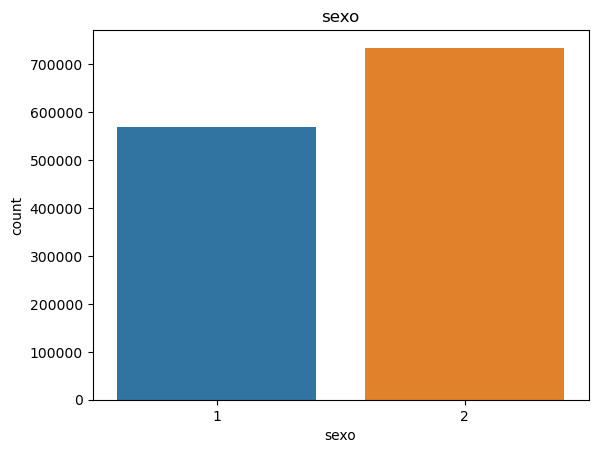

In [3]:
sns.countplot(x = incaData['sexo']);
plt.title("sexo")

# Sexo do individuo 

Text(0.5, 1.0, 'raça/cor')

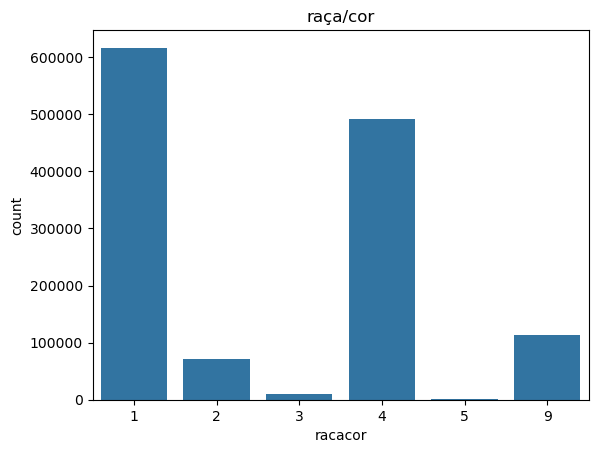

In [10]:
incaData = incaData.drop(incaData[incaData['racacor'] >= 99].index)
sns.countplot(x = incaData['racacor'])
plt.title("raça/cor")

#1.Branca; 2.Preta; 3.Amarela; 4.Parda; 5.Indígena; 9.Sem informação

Text(0.5, 1.0, 'Clínica de início do tratamento')

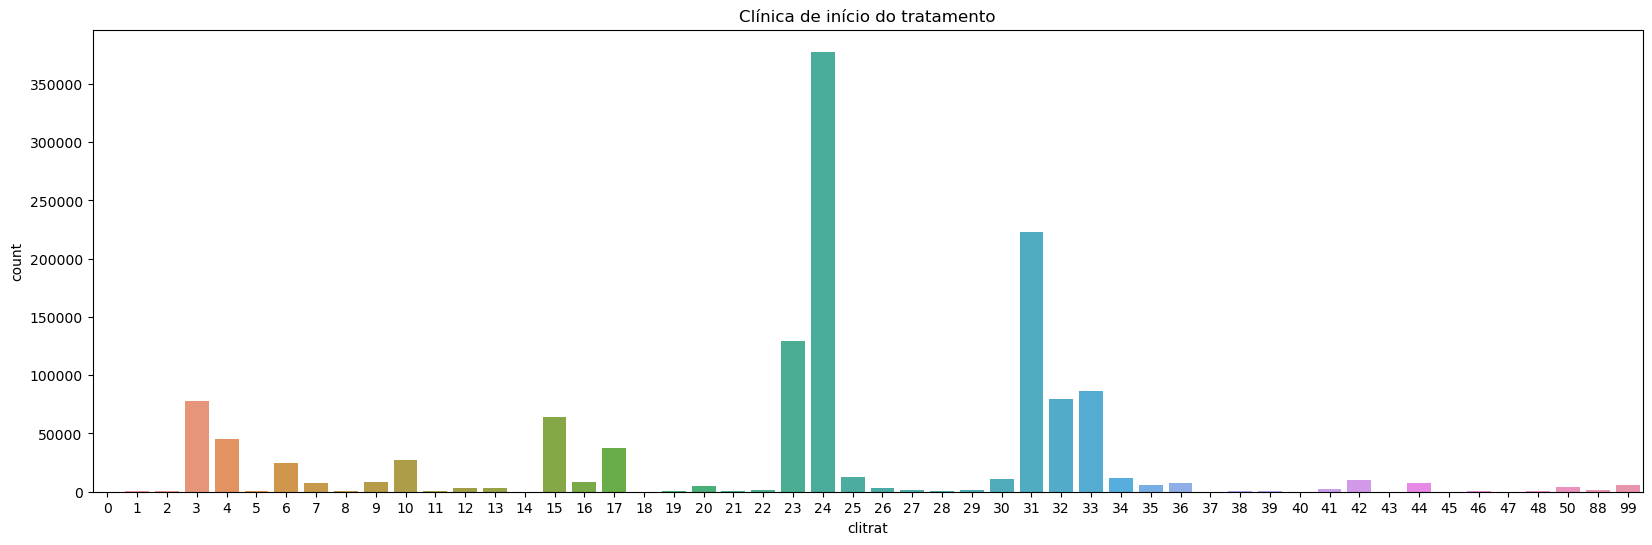

In [5]:
plt.figure(figsize=(20, 6)) 
sns.countplot(x = incaData['clitrat']);
plt.title("Clínica de início do tratamento")

#Clínica de início do tratamento Codificação segundo Tabela de Clínicas do SisRHC

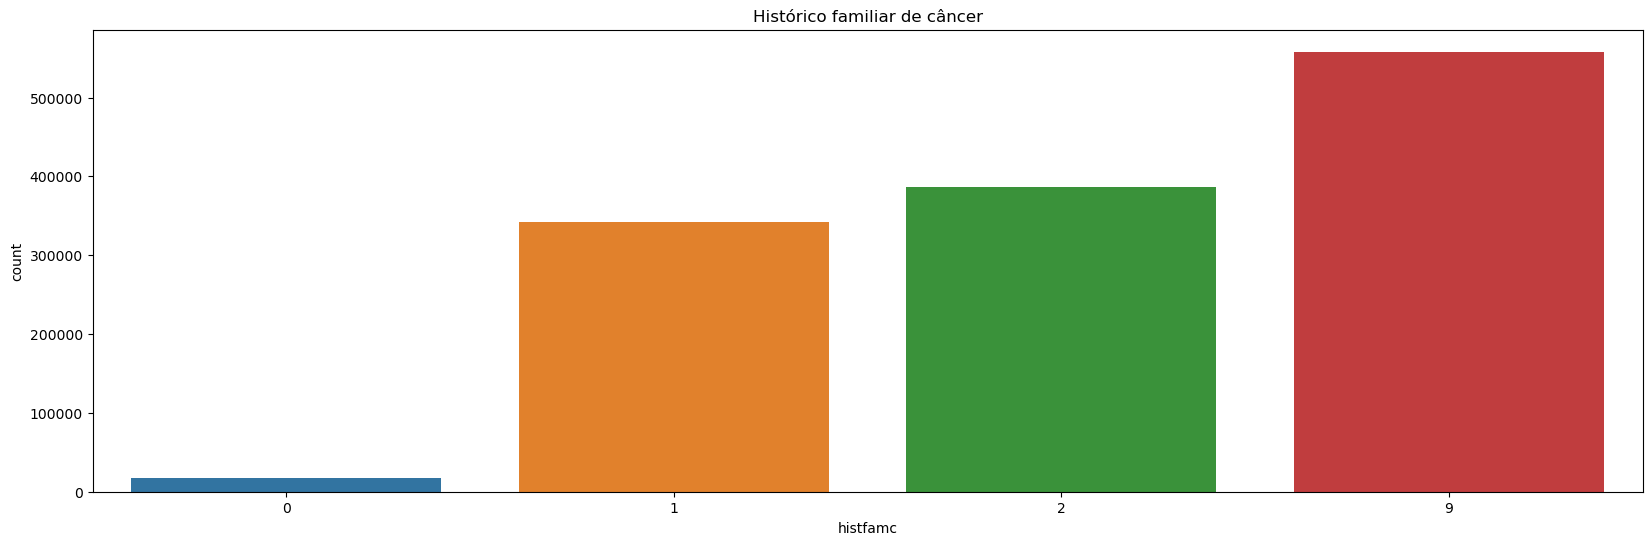

In [6]:
plt.figure(figsize=(20, 6))  # Ajuste o tamanho da figura conforme necessário
plt.title("Histórico familiar de câncer")
sns.countplot(x = incaData['histfamc']);

#Histórico familiar de câncer 1.Sim; 2.Não; 9.Sem informação

#O que é o 0?

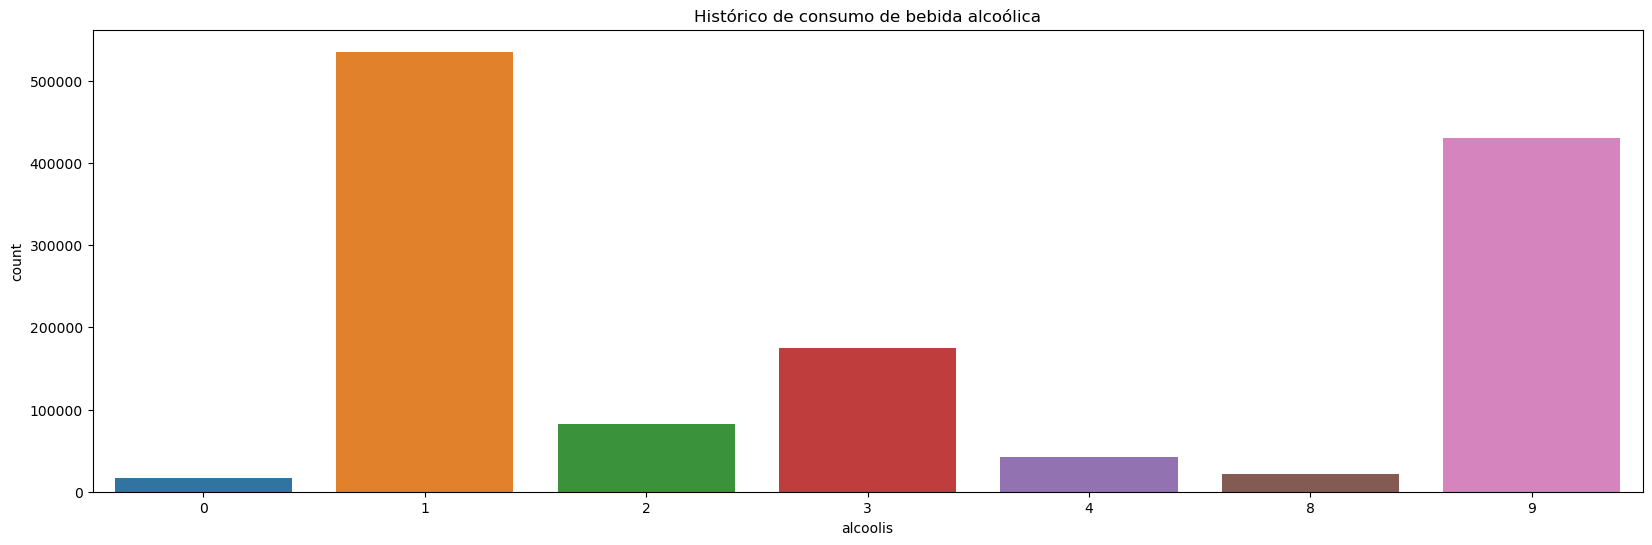

In [7]:
plt.figure(figsize=(20, 6))  # Ajuste o tamanho da figura conforme necessário
plt.title("Histórico de consumo de bebida alcoólica")
sns.countplot(x = incaData['alcoolis']);
#1.Nunca; 2.Ex-consumidor; 3.Sim; 4.Não avaliado; 8.Não se aplica; 9.Sem informação
#O que é o 0?

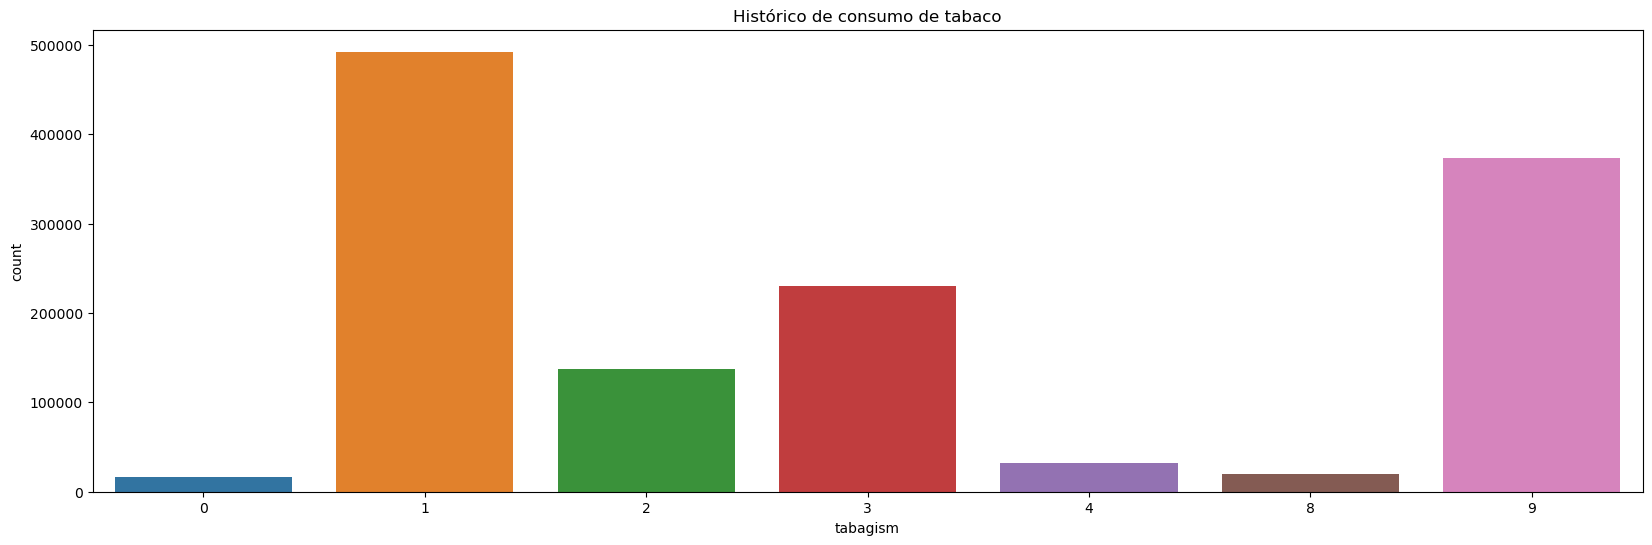

In [8]:
plt.figure(figsize=(20, 6))  # Ajuste o tamanho da figura conforme necessário
plt.title("Histórico de consumo de tabaco")
sns.countplot(x = incaData['tabagism']);
#1.Nunca; 2.Ex-consumidor; 3.Sim; 4.Não avaliado; 8.Não se aplica; 9.Sem informação
#O que é o 0?

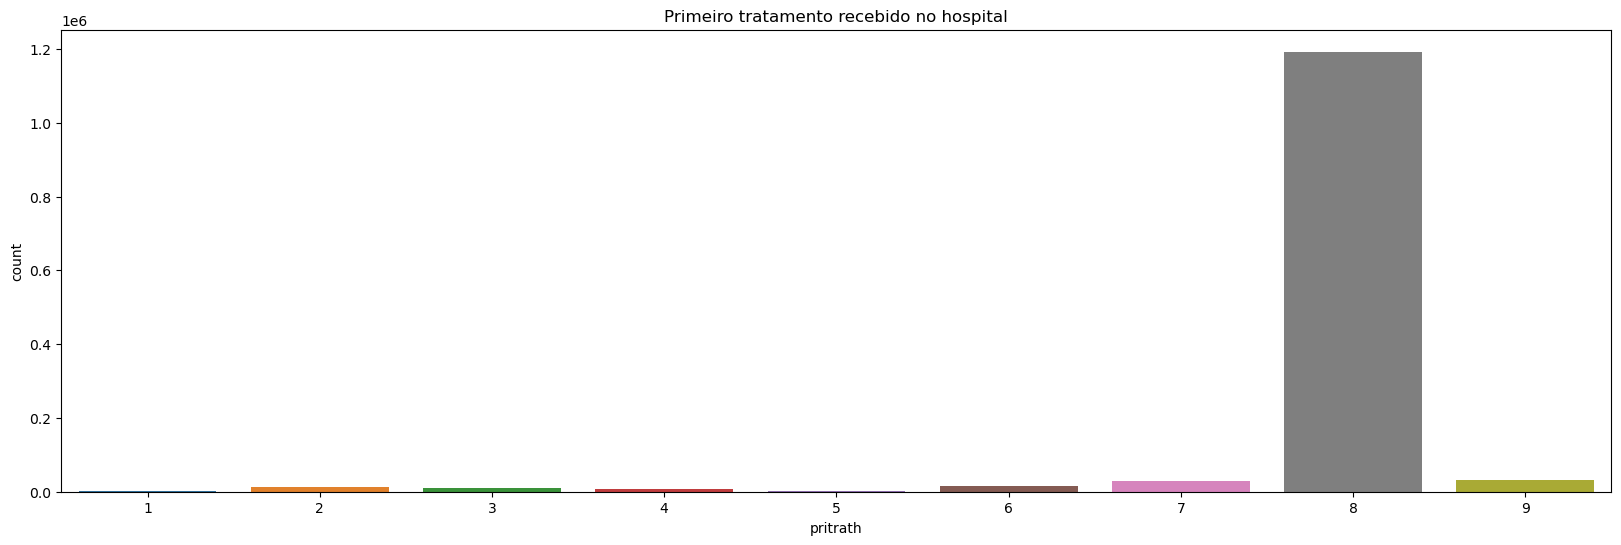

In [9]:
plt.figure(figsize=(20, 6))  # Ajuste o tamanho da figura conforme necessário
plt.title("Primeiro tratamento recebido no hospital")
sns.countplot(x = incaData['pritrath']);
#1.Nenhum; 2. Cirurgia; 3.Radioterapia; 4.Quimioterapia; 5.Hormonioterapia;6.Transplante de medula óssea; 7.Imunoterapia; 8.Outras; 9.Seminformação

In [10]:
plt.figure(figsize=(200, 50))  # Ajuste o tamanho da figura conforme necessário
plt.title("ocupação principal", fontsize=100)
sns.countplot(x = incaData['ocupacao']);
plt.show()
#Codificação pela Tabela da Código Brasileiro de Ocupações; mais de três 9 representa Ocupação ignorada 
#mais de três 9 representa Ocupação ignorada ?

In [ ]:
incaData['ocupacao'].describe()
#idade -1 

In [11]:
plt.figure(figsize=(200, 50)) 
plt.title("IDADE", fontsize=100)
sns.countplot(x = incaData['idade1']);
#Idade, em anos; valor igual a zero para crianças menores de 1 an

In [12]:
plt.figure(figsize=((200, 50)))  # Ajuste o tamanho da figura conforme necessário
plt.title("Dias",fontsize=100)
sns.countplot(x = incaData['dias']);

#Pode ser importante


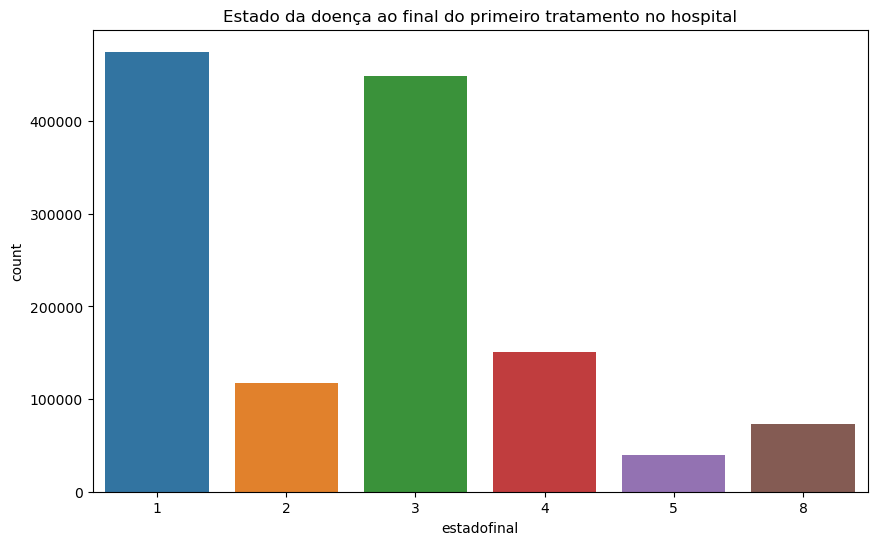

In [13]:
plt.figure(figsize=(10, 6))  # Ajuste o tamanho da figura conforme necessário
plt.title("Estado da doença ao final do primeiro tratamento no hospital")
sns.countplot(x = incaData['estadofinal'])
#1.Sem evidência da doença (remissão completa); 2.Remissão parcial;3.Doença estável; 4.Doença em progressão; 5.Suporte terapêutico oncológico; 6. Óbito; 8. Não se aplica; 9. Sem informação
#nao possui obito

#Pode retirar da base de dados durante o treinamento o valor 9, sem informação?
#Teste feitos sem considerar esse atributo

In [44]:
incaData[incaData['estadofinal'] == 6]

,sexo,racacor,clitrat,histfamc,alcoolis,tabagism,loctudet,tnm,estadiam,pritrath,ocupacao,dias,idade1,tipohist1,tipohist2,estadofinal


# Atributos categoricos

In [133]:
def sel_categoricos(data):
    lista = []
    for column in data.columns:
        if (data[column].dtype == 'object'):
            lista.append(column)
    return lista

In [136]:
categoricos = sel_categoricos(incaData)
print(categoricos)

['loctudet', 'tnm', 'estadiam', 'tipohist1', 'tipohist2']


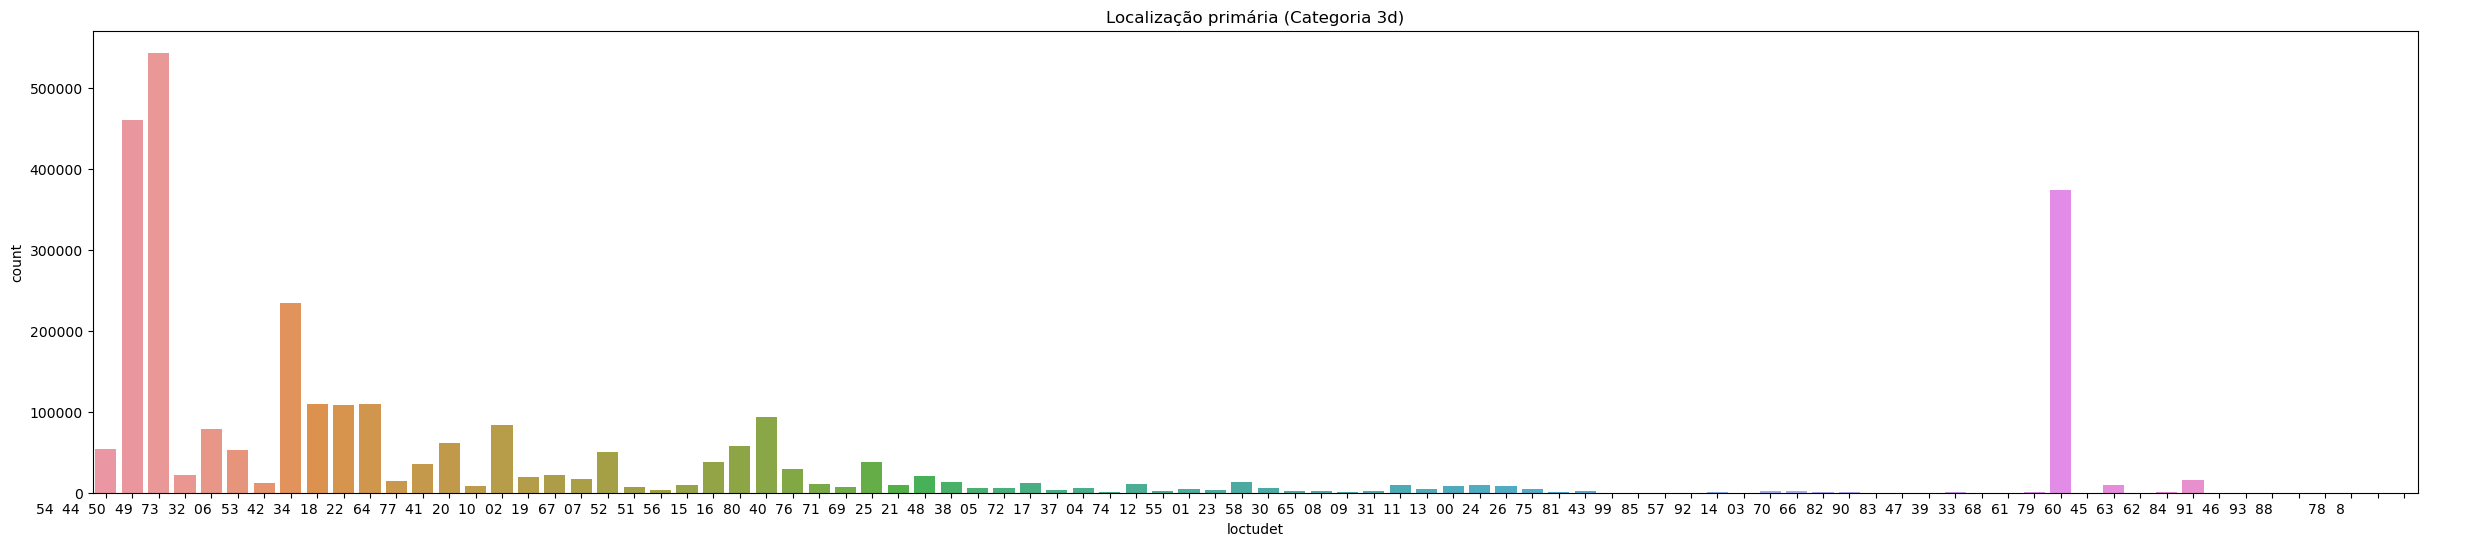

In [45]:
plt.figure(figsize=(30, 6))  # Ajuste o tamanho da figura conforme necessário
plt.title("Localização primária (Categoria 3d)")
sns.countplot(x = incaData['loctudet']);
#Código da CID-O, 3 dígitos

In [46]:
incaData['loctudet'][3]
# 3 digitos mas como vemos abaixo ?

'50                            '

In [47]:
plt.figure(figsize=(200, 50))  # Ajuste o tamanho da figura conforme necessário
plt.title("TNM")
sns.countplot(x = incaData['tnm']);
#O que é tnm, não esta no dicionario
# O que é tnm

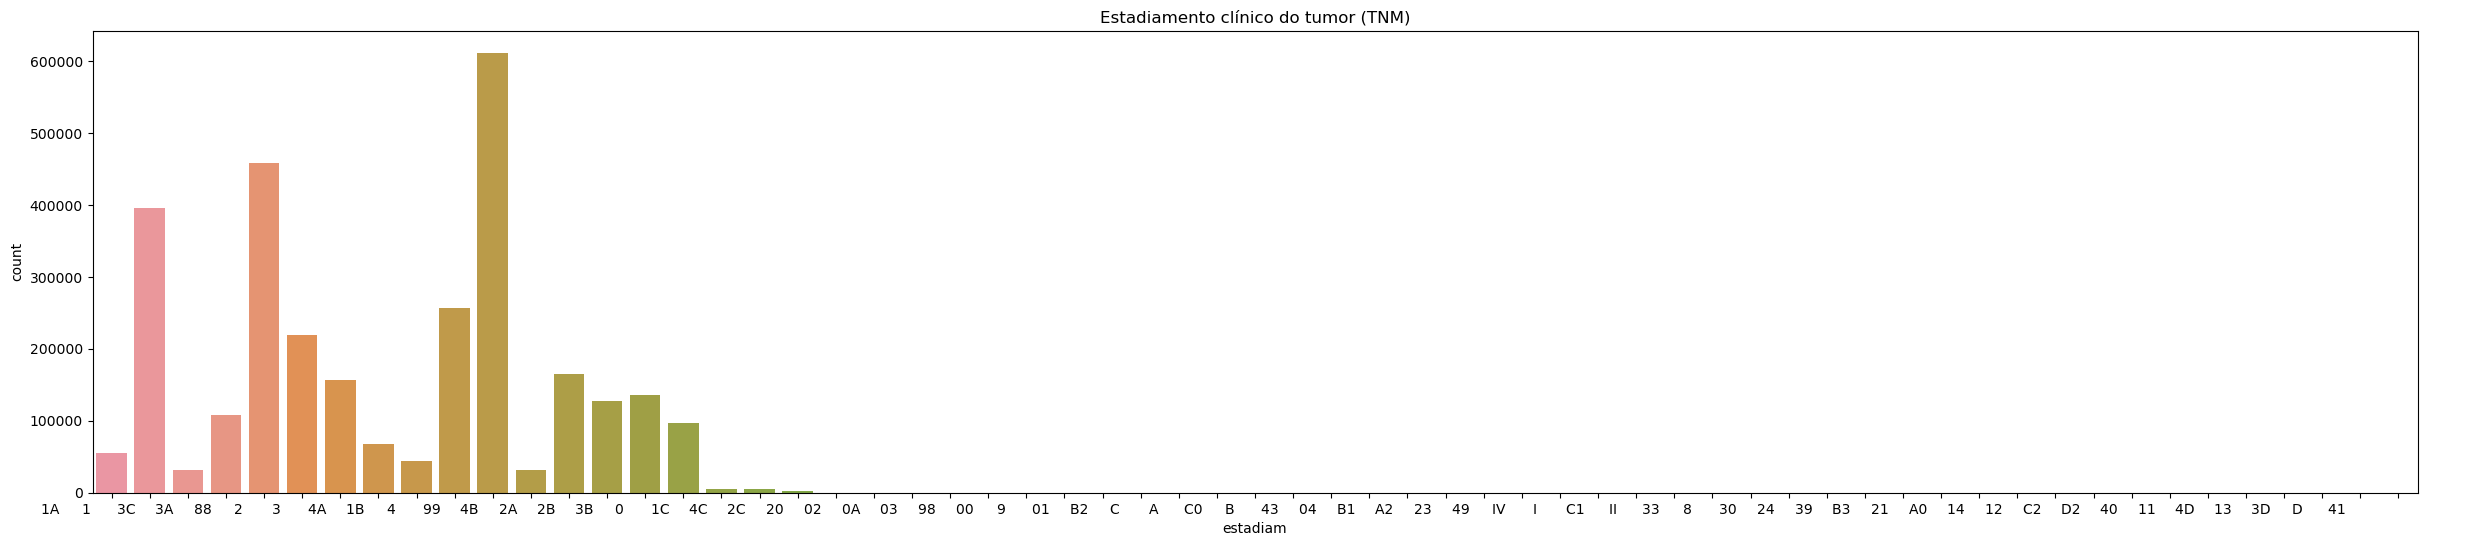

In [48]:
plt.figure(figsize=(30, 6))  # Ajuste o tamanho da figura conforme necessário
plt.title("Estadiamento clínico do tumor (TNM)")
sns.countplot(x = incaData['estadiam']);
#Codificação do grupamento do estádio clínico segundo classificação TNM

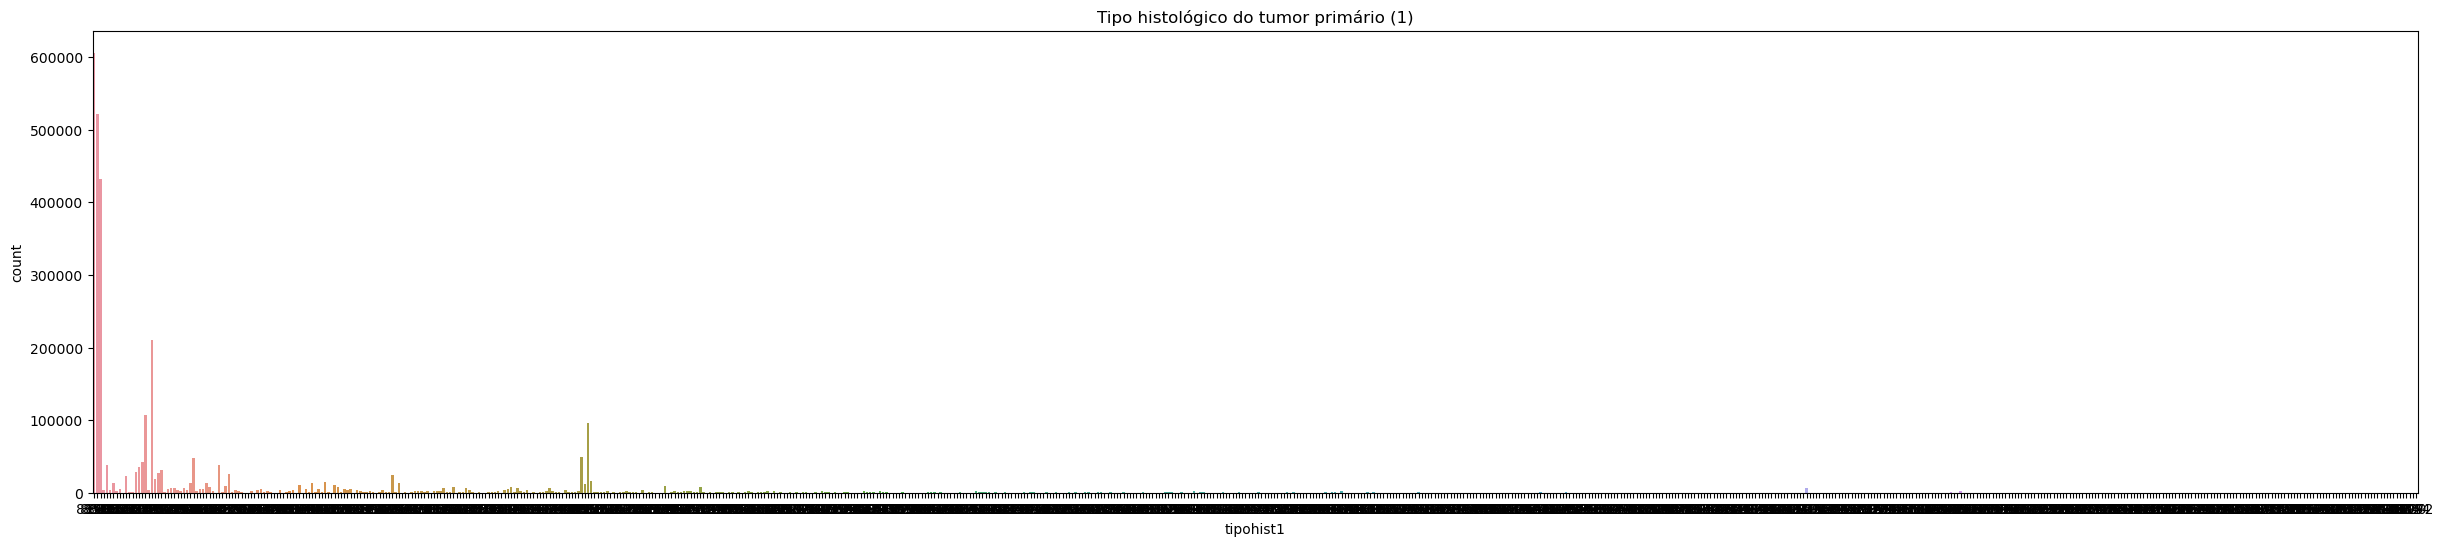

In [53]:
plt.figure(figsize=(30, 6))  # Ajuste o tamanho da figura conforme necessário
plt.title("Tipo histológico do tumor primário (1)")
sns.countplot(x = incaData['tipohist1']);
#Codificação da morfologia do tumor pela CID-O 

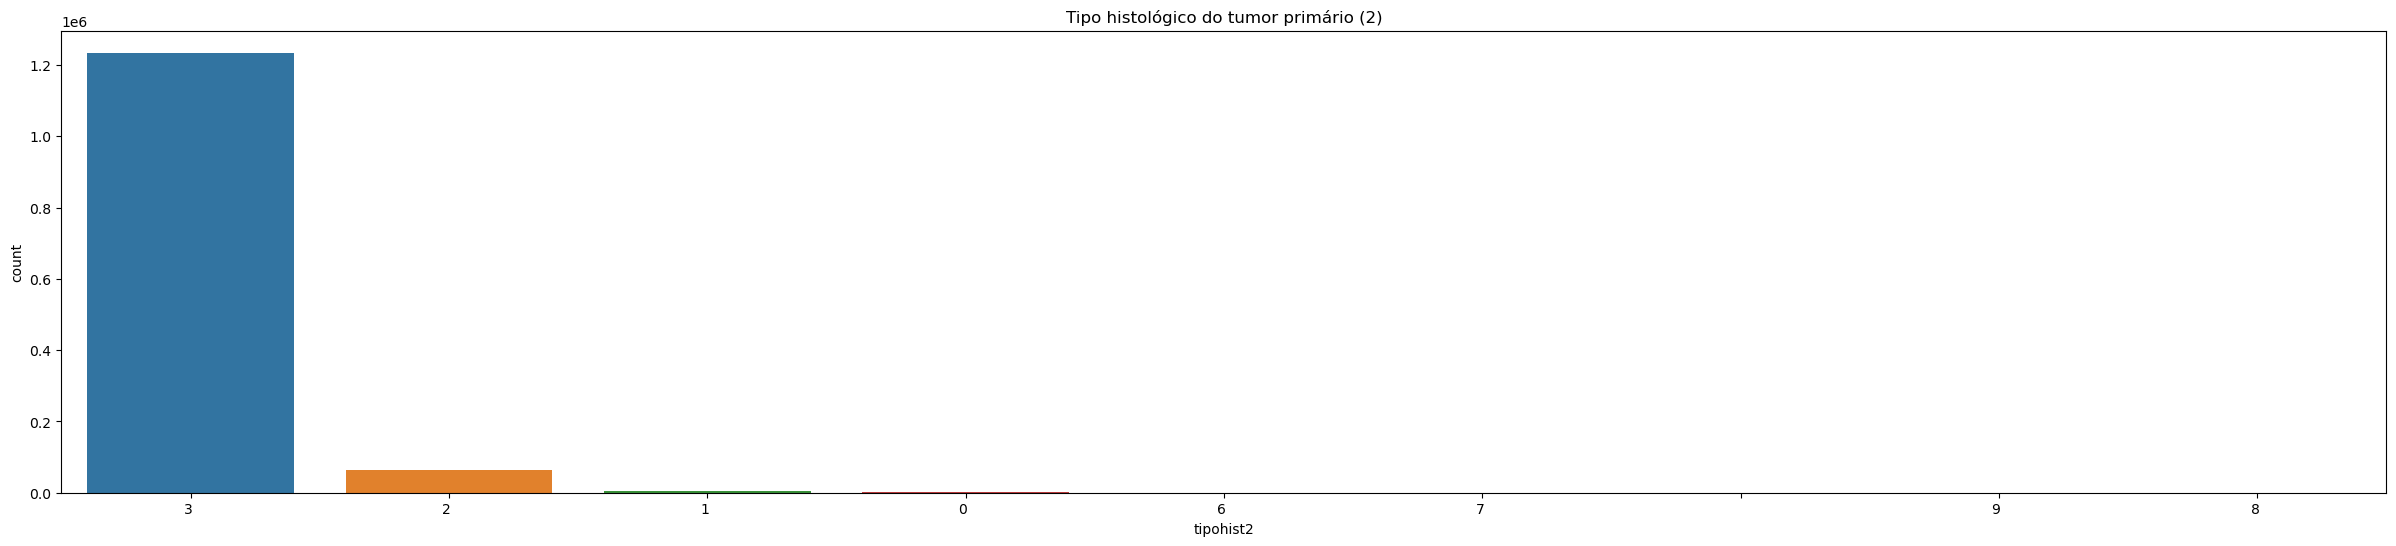

In [14]:
plt.figure(figsize=(30, 6))  # Ajuste o tamanho da figura conforme necessário
plt.title("Tipo histológico do tumor primário (2)")
sns.countplot(x = incaData['tipohist2']);
#Codificação da morfologia do tumor pela CID-O 

#Qual a diferença do hist 1 e hist 2

In [5]:
incaData.describe()

,sexo,racacor,clitrat,histfamc,alcoolis,tabagism,pritrath,ocupacao,dias,idade1,estadofinal
count,2.973448e+06,2.973448e+06,2.973448e+06,2.973448e+06,2.973448e+06,2.973448e+06,2.973448e+06,2.973448e+06,2.973448e+06,2.973448e+06,2.973448e+06
mean,1.543984e+00,5.115550e+00,2.373771e+01,3.328706e+00,2.977401e+00,2.805936e+00,7.920119e+00,3.371611e+06,1.091975e+02,5.814433e+01,6.209869e+00
std,4.980617e-01,3.483442e+00,1.247911e+01,3.911973e+00,3.681576e+00,3.521942e+00,6.838337e-01,7.207250e+05,1.953291e+02,1.677594e+01,3.362362e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.100049e+06,0.000000e+00,-1.000000e+00,1.000000e+00
25%,1.000000e+00,1.000000e+00,1.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00,3.106200e+06,1.200000e+01,4.800000e+01,3.000000e+00
50%,2.000000e+00,4.000000e+00,2.400000e+01,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00,3.507506e+06,5.600000e+01,6.000000e+01,9.000000e+00
75%,2.000000e+00,9.000000e+00,3.100000e+01,9.000000e+00,9.000000e+00,3.000000e+00,8.000000e+00,3.550308e+06,1.210000e+02,7.000000e+01,9.000000e+00
max,2.000000e+00,9.900000e+01,9.900000e+01,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,5.300108e+06,2.000000e+03,9.900000e+01,9.000000e+00


In [11]:
incaData['idade1'][incaData['idade1'] > 0].mean()
incaData.loc[incaData['idade1'] < 0,'idade1'] = 58
#substituido pela media

In [78]:
incaData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1304004 entries, 3 to 2973447
Data columns (total 16 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   sexo         1304004 non-null  int64 
 1   racacor      1304004 non-null  int64 
 2   clitrat      1304004 non-null  int64 
 3   histfamc     1304004 non-null  int64 
 4   alcoolis     1304004 non-null  int64 
 5   tabagism     1304004 non-null  int64 
 6   loctudet     1304004 non-null  object
 7   tnm          1304004 non-null  object
 8   estadiam     1304004 non-null  object
 9   pritrath     1304004 non-null  int64 
 10  ocupacao     1304004 non-null  int64 
 11  dias         1304004 non-null  int64 
 12  idade1       1304004 non-null  int64 
 13  tipohist1    1304004 non-null  object
 14  tipohist2    1304004 non-null  object
 15  estadofinal  1304004 non-null  int64 
dtypes: int64(11), object(5)
memory usage: 169.1+ MB


# Treinamentos

## Divisao entre previsores e classe

In [12]:
incaData.describe()

,sexo,racacor,clitrat,histfamc,alcoolis,tabagism,pritrath,ocupacao,dias,idade1,estadofinal
count,1.304004e+06,1.304004e+06,1.304004e+06,1.304004e+06,1.304004e+06,1.304004e+06,1.304004e+06,1.304004e+06,1.304004e+06,1.304004e+06,1.304004e+06
mean,1.563245e+00,2.901392e+00,2.368454e+01,4.707780e+00,4.173556e+00,3.923578e+00,7.839261e+00,3.272595e+06,1.137918e+02,5.745400e+01,2.637820e+00
std,4.959841e-01,2.334568e+00,1.089262e+01,3.735510e+00,3.574420e+00,3.408096e+00,9.047023e-01,8.907216e+05,1.986968e+02,1.678870e+01,1.747348e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.100049e+06,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.000000e+00,1.000000e+00,2.300000e+01,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00,2.704302e+06,1.900000e+01,4.700000e+01,1.000000e+00
50%,2.000000e+00,2.000000e+00,2.400000e+01,2.000000e+00,3.000000e+00,3.000000e+00,8.000000e+00,3.162500e+06,5.900000e+01,5.900000e+01,3.000000e+00
75%,2.000000e+00,4.000000e+00,3.100000e+01,9.000000e+00,9.000000e+00,9.000000e+00,8.000000e+00,4.106902e+06,1.250000e+02,6.900000e+01,3.000000e+00
max,2.000000e+00,9.000000e+00,9.900000e+01,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,5.300108e+06,2.000000e+03,9.900000e+01,8.000000e+00


In [83]:
X_incaData = incaData.iloc[:, 0:15].values


In [84]:
Y_incaData = incaData.iloc[:, 15].values



## Mapeamento 

In [85]:


# Definir um dicionário para mapear os valores a serem substituídos
mapeamento = {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 8: 5}

# Aplicar a substituição usando list comprehension
Y_incaData = [mapeamento[x] if x in mapeamento else x for x in Y_incaData]

Y_incaData = pd.DataFrame(Y_incaData)



## Tratamento dos atributos categoricos

## Label encoder

In [86]:
from sklearn.preprocessing import LabelEncoder

In [87]:
label_encoder_loctudet = LabelEncoder()
label_encoder_tnm = LabelEncoder()
label_encoder_estadiam = LabelEncoder()
label_encoder_tipohist1 = LabelEncoder()
label_encoder_tipohist2 = LabelEncoder()


In [88]:
X_incaData[:,6] = label_encoder_loctudet.fit_transform(X_incaData[:,6])
X_incaData[:,7] = label_encoder_tnm.fit_transform(X_incaData[:,7])
X_incaData[:,8] = label_encoder_estadiam.fit_transform(X_incaData[:,8])
X_incaData[:,13] = label_encoder_tipohist1.fit_transform(X_incaData[:,13])
X_incaData[:,14] = label_encoder_tipohist2.fit_transform(X_incaData[:,14])


## Escalonamento de valores

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_incaData = scaler.fit_transform(X_incaData)

## Divisão das bases em treinamento e teste

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_data_treinamento, X_data_teste, y_train , y_test  = train_test_split(X_incaData, Y_incaData, test_size = 0.10, random_state = 0)

## Deep Learning

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_data_treinamento)

X_train = scaler.transform(X_data_treinamento)
X_test = scaler.transform(X_data_teste)

In [93]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_shape=(15,), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

c:\Users\Vini\anaconda3\envs\my_IC\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [94]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

In [95]:
BATCH_SIZE = 4
EPOCHS = 30

In [96]:
X_train.shape

(1173603, 15)

In [97]:
y_train.shape

(1173603, 1)

In [98]:
model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/30
  2212/293401 ━━━━━━━━━━━━━━━━━━━━ 4:47 987us/step - accuracy: 0.4266 - loss: 1.4408

KeyboardInterrupt: 

# Older

In [38]:
from sklearn.neural_network import MLPClassifier

In [42]:
rede_neural_Inca = MLPClassifier(max_iter=1500, verbose=True, tol=0.0000100,
                                   solver = 'adam', activation = 'logistic',
                                   )
rede_neural_Inca.fit(X_data_treinamento, y_data_treinamento)

Iteration 1, loss = 1.33034362
Iteration 2, loss = 1.24116533
Iteration 3, loss = 1.20289708
Iteration 4, loss = 1.18408331
Iteration 5, loss = 1.16698759
Iteration 6, loss = 1.15267623
Iteration 7, loss = 1.14063200
Iteration 8, loss = 1.12913317
Iteration 9, loss = 1.12107125
Iteration 10, loss = 1.11620380
Iteration 11, loss = 1.11309766
Iteration 12, loss = 1.11075737
Iteration 13, loss = 1.10863611
Iteration 14, loss = 1.10677572
Iteration 15, loss = 1.10520909
Iteration 16, loss = 1.10365443
Iteration 17, loss = 1.10225528
Iteration 18, loss = 1.10091163
Iteration 19, loss = 1.09960483
Iteration 20, loss = 1.09840685
Iteration 21, loss = 1.09697671
Iteration 22, loss = 1.09579637
Iteration 23, loss = 1.09456629
Iteration 24, loss = 1.09346149
Iteration 25, loss = 1.09239866
Iteration 26, loss = 1.09143477
Iteration 27, loss = 1.09051093
Iteration 28, loss = 1.08971278
Iteration 29, loss = 1.08900492
Iteration 30, loss = 1.08830553
Iteration 31, loss = 1.08778186
Iteration 32, los

MLPClassifier(activation='logistic', max_iter=1500, tol=1e-05, verbose=True)

## Previsao

In [45]:
previsoes = rede_neural_Inca.predict(X_data_teste)
previsoes

array([3, 1, 3, ..., 1, 1, 1], dtype=int64)

## Metrics

In [46]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_data_teste, previsoes)

0.6020582664243372

0.6020582664243372

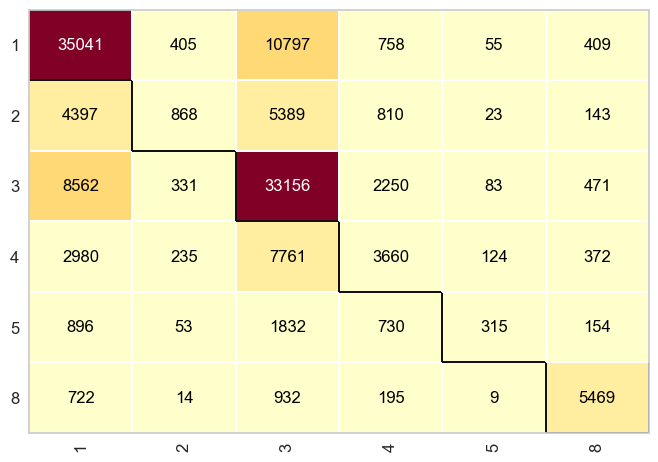

In [47]:
import yellowbrick
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rede_neural_Inca)
cm.fit(X_data_treinamento, y_data_treinamento)
cm.score(X_data_teste, y_data_teste)

In [48]:
print(classification_report(y_data_teste, previsoes))

              precision    recall  f1-score   support

           1       0.67      0.74      0.70     47465
           2       0.46      0.07      0.13     11630
           3       0.55      0.74      0.63     44853
           4       0.44      0.24      0.31     15132
           5       0.52      0.08      0.14      3980
           8       0.78      0.74      0.76      7341

    accuracy                           0.60    130401
   macro avg       0.57      0.44      0.45    130401
weighted avg       0.58      0.60      0.57    130401



# Random Forest 65,6%

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
random_forest = RandomForestClassifier(n_estimators=70, criterion='entropy', random_state = 0)
random_forest.fit(X_data_treinamento, y_data_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=70, random_state=0)

In [52]:
previsoes = random_forest.predict(X_data_teste)


In [53]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_data_teste, previsoes)

0.6610608814349583

0.6610608814349583

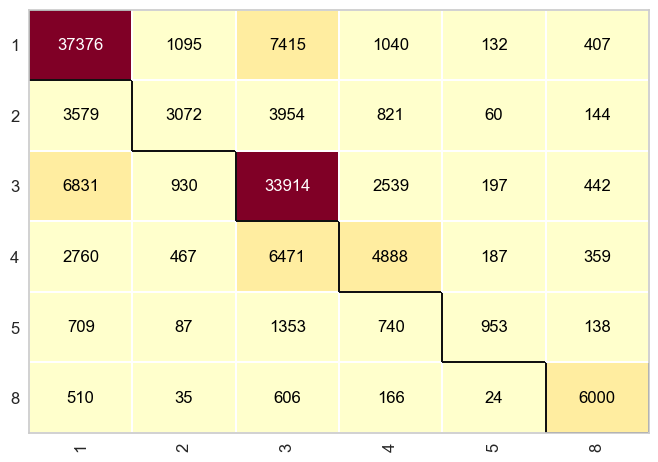

In [55]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest)
cm.fit(X_data_treinamento, y_data_treinamento)
cm.score(X_data_teste, y_data_teste)

In [57]:
print(classification_report(y_data_teste, previsoes))

              precision    recall  f1-score   support

           1       0.72      0.79      0.75     47465
           2       0.54      0.26      0.35     11630
           3       0.63      0.76      0.69     44853
           4       0.48      0.32      0.39     15132
           5       0.61      0.24      0.34      3980
           8       0.80      0.82      0.81      7341

    accuracy                           0.66    130401
   macro avg       0.63      0.53      0.56    130401
weighted avg       0.65      0.66      0.64    130401



# SVM

In [58]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(kernel='rbf', random_state=1, C = 2.0) # 2 -> 4
svm.fit(X_data_treinamento, y_data_treinamento)

In [ ]:
previsoes = svm_credit.predict(X_data_teste)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_data_teste, previsoes)

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(svm)
cm.fit(X_data_treinamento, y_data_treinamento)
cm.score(X_data_teste, y_data_teste)